In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("NDSI NDTI NDSI pH DO_Upper Lake_LW.csv",parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df=df.set_index("date")
df

,Chlorophyll,Turbidity,Salinity,Dissolved Oxygen,pH,Year,Month,Day
date,,,,,,,,
2018-12-18,0.049798,-0.043534,-0.043534,4.143289,7.555850,2018,12,18
2018-12-23,0.196289,-0.118611,-0.118611,3.328343,7.648476,2018,12,23
2018-12-28,0.226072,-0.143236,-0.143236,4.161987,7.762076,2018,12,28
2019-01-02,0.221531,-0.127573,-0.127573,3.939463,7.770441,2019,01,02
2019-01-07,0.199136,-0.122187,-0.122187,4.866198,7.810374,2019,01,07
...,...,...,...,...,...,...,...,...
2022-12-02,0.039797,-0.052901,-0.052901,4.629287,7.510670,2022,12,02
2022-12-07,0.040943,-0.051414,-0.051414,4.840343,7.541624,2022,12,07
2022-12-17,0.049085,-0.045195,-0.045195,5.022258,7.591463,2022,12,17


In [4]:
df.columns

Index(['Chlorophyll', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH',
       'Year', 'Month', 'Day'],
      dtype='object')

In [5]:
df1=df.filter(['Chlorophyll', 'Turbidity', 'Salinity', 'Dissolved Oxygen', 'pH'])
df1.describe()

,Chlorophyll,Turbidity,Salinity,Dissolved Oxygen,pH
count,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.121776,-0.109960,-0.109960,5.667765,7.449921
std,0.052777,0.081830,0.081830,3.246588,0.793128
min,-0.018934,-0.385234,-0.385234,1.124000,-0.536718
25%,0.074510,-0.169638,-0.169638,4.036778,7.317299
50%,0.123819,-0.099832,-0.099832,5.266542,7.567512
75%,0.165305,-0.048569,-0.048569,6.543988,7.755581
max,0.246974,0.047738,0.047738,33.115134,8.217798


In [6]:
nan_count = df1.isna().sum()
print(nan_count)

Chlorophyll         0
Turbidity           0
Salinity            0
Dissolved Oxygen    0
pH                  0
dtype: int64


# Chlorophyll

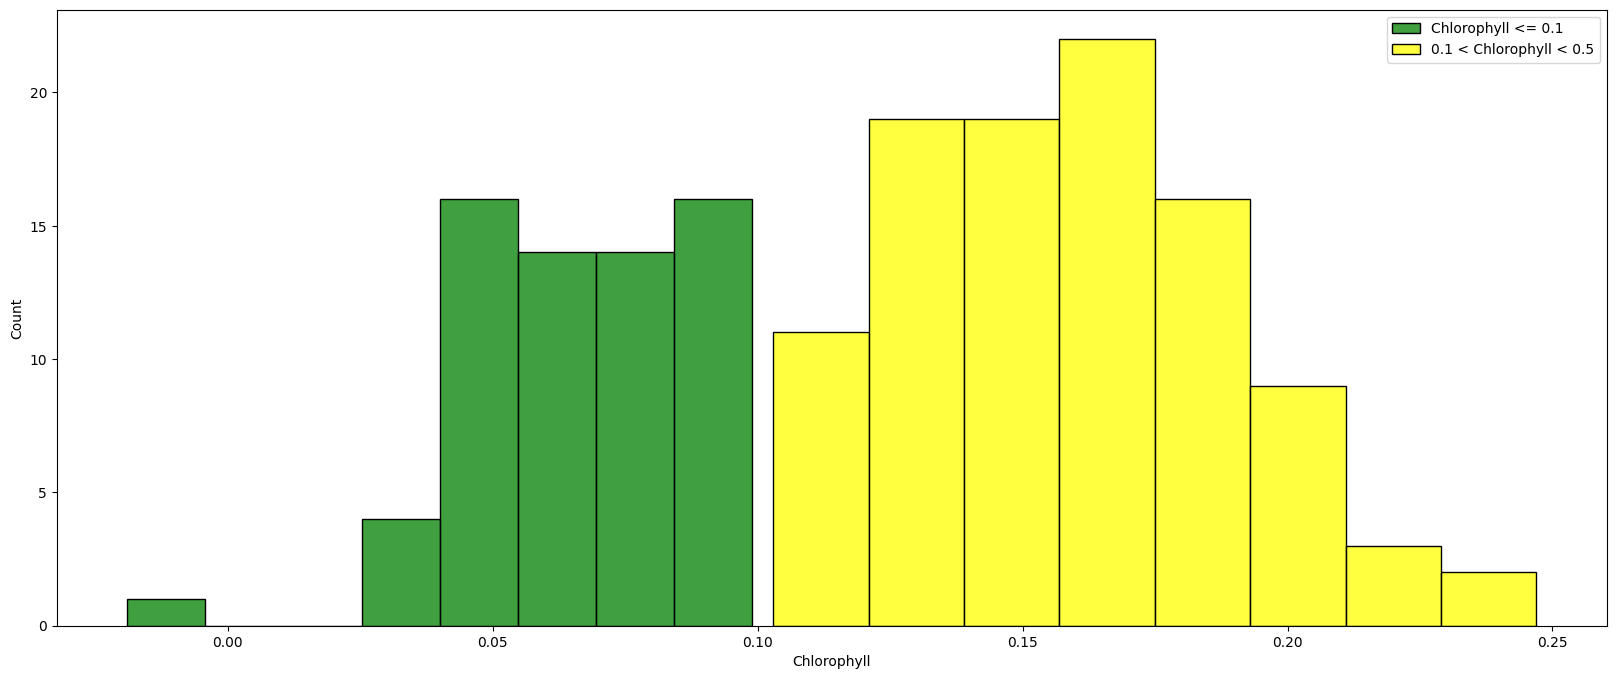

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] <= 0.1) & (df['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] > 0.1) & (df['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5')
ax.set_xlabel('Chlorophyll')
ax.set_ylabel('Count')
ax.legend()
plt.show()

About 60% of the Chlorophyll lies in the Need treatment zone.

About 30% of Chlorophyll lies in Good zone


### *Before And After Monsoon*

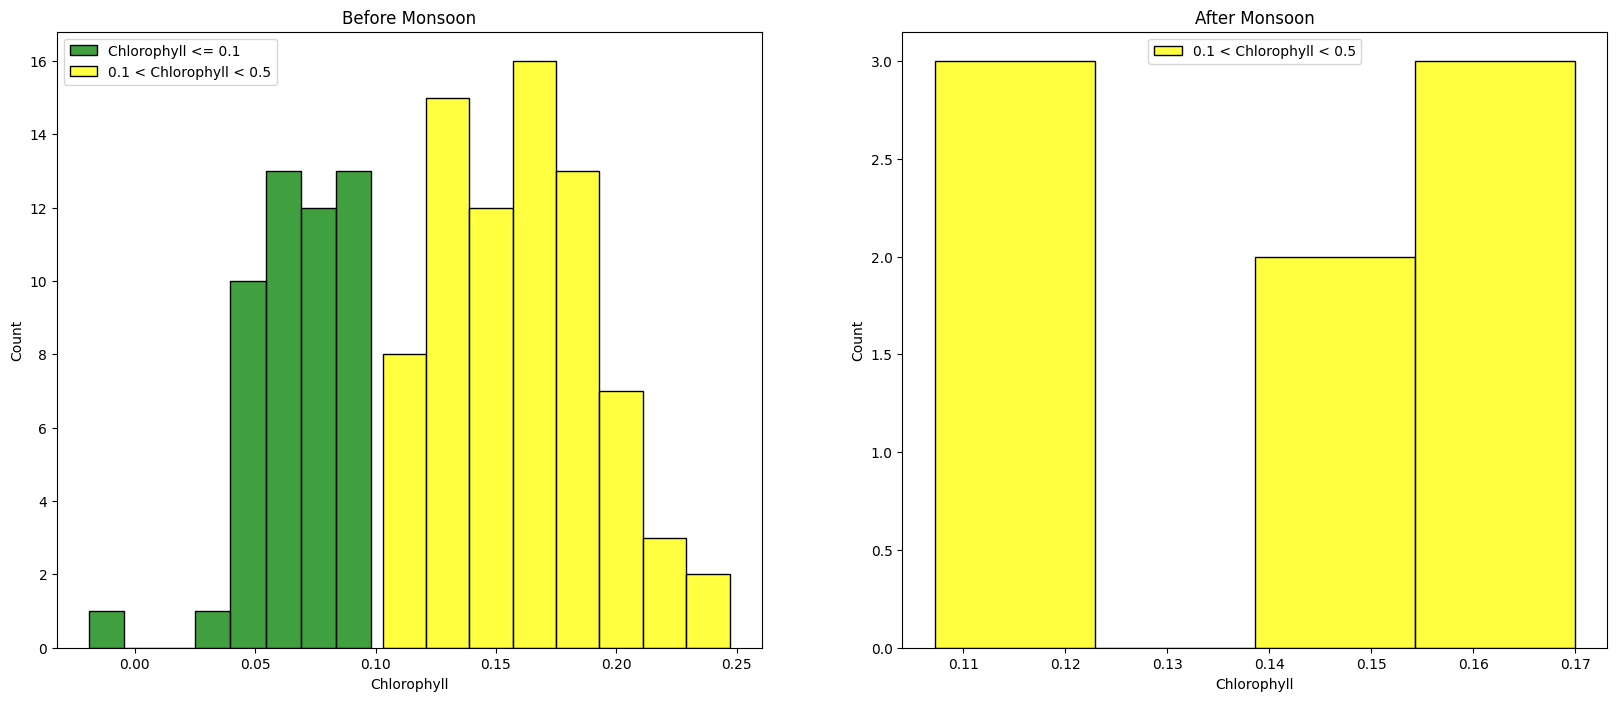

In [21]:
# Create two dataframes, one for before monsoon and one for after monsoon
df_before_monsoon = df[(df.index.month < 6) | (df.index.month == 12)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]
# Create two subplots, one for before monsoon and one for after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for chlorophyll in each dataframe
sns.histplot(x='Chlorophyll', data=df_before_monsoon[(df_before_monsoon['Chlorophyll'] <= 0.1) & (df_before_monsoon['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1', ax=ax1)
sns.histplot(x='Chlorophyll', data=df_before_monsoon[(df_before_monsoon['Chlorophyll'] > 0.1) & (df_before_monsoon['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5', ax=ax1)
sns.histplot(x='Chlorophyll', data=df_before_monsoon[(df_before_monsoon['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5', ax=ax1)
ax1.set_xlabel('Chlorophyll')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='Chlorophyll', data=df_after_monsoon[(df_after_monsoon['Chlorophyll'] <= 0.1) & (df_after_monsoon['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1', ax=ax2)
sns.histplot(x='Chlorophyll', data=df_after_monsoon[(df_after_monsoon['Chlorophyll'] > 0.1) & (df_after_monsoon['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5', ax=ax2)
sns.histplot(x='Chlorophyll', data=df_after_monsoon[(df_after_monsoon['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5', ax=ax2)
ax2.set_xlabel('Chlorophyll')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()

plt.show()

### *Before and After COVID-19*

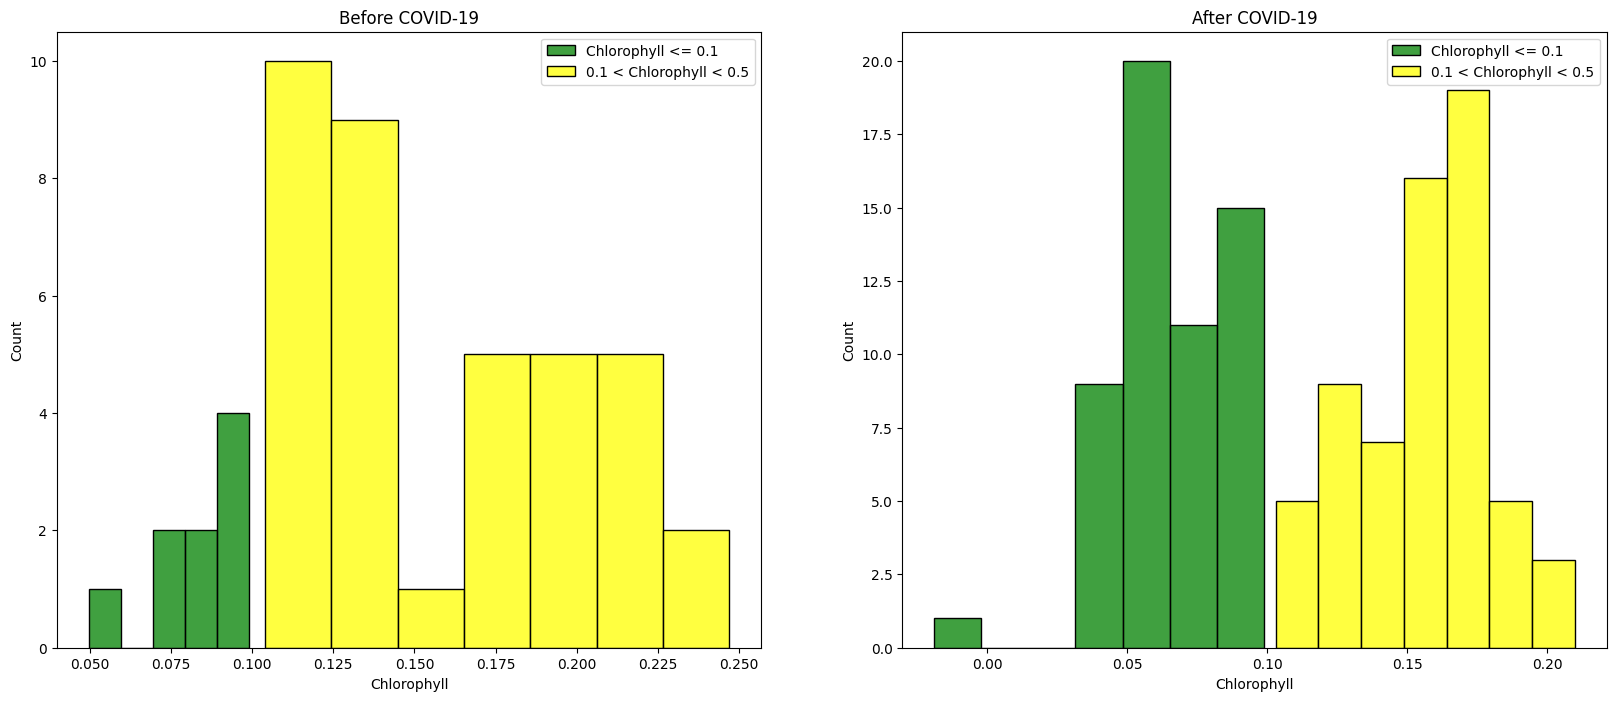

In [24]:
# Create two dataframes, one for before COVID-19 and one for after COVID-19
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

# Create two subplots, one for before COVID-19 and one for after COVID-19
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for chlorophyll in each dataframe
sns.histplot(x='Chlorophyll', data=df_before_covid[(df_before_covid['Chlorophyll'] <= 0.1) & (df_before_covid['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1', ax=ax1)
sns.histplot(x='Chlorophyll', data=df_before_covid[(df_before_covid['Chlorophyll'] > 0.1) & (df_before_covid['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5', ax=ax1)
sns.histplot(x='Chlorophyll', data=df_before_covid[(df_before_covid['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5', ax=ax1)
ax1.set_xlabel('Chlorophyll')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID-19')
ax1.legend()

sns.histplot(x='Chlorophyll', data=df_after_covid[(df_after_covid['Chlorophyll'] <= 0.1) & (df_after_covid['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1', ax=ax2)
sns.histplot(x='Chlorophyll', data=df_after_covid[(df_after_covid['Chlorophyll'] > 0.1) & (df_after_covid['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5', ax=ax2)
sns.histplot(x='Chlorophyll', data=df_after_covid[(df_after_covid['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5', ax=ax2)
ax2.set_xlabel('Chlorophyll')
ax2.set_ylabel('Count')
ax2.set_title('After COVID-19')
ax2.legend()

plt.show()

# Turbidity

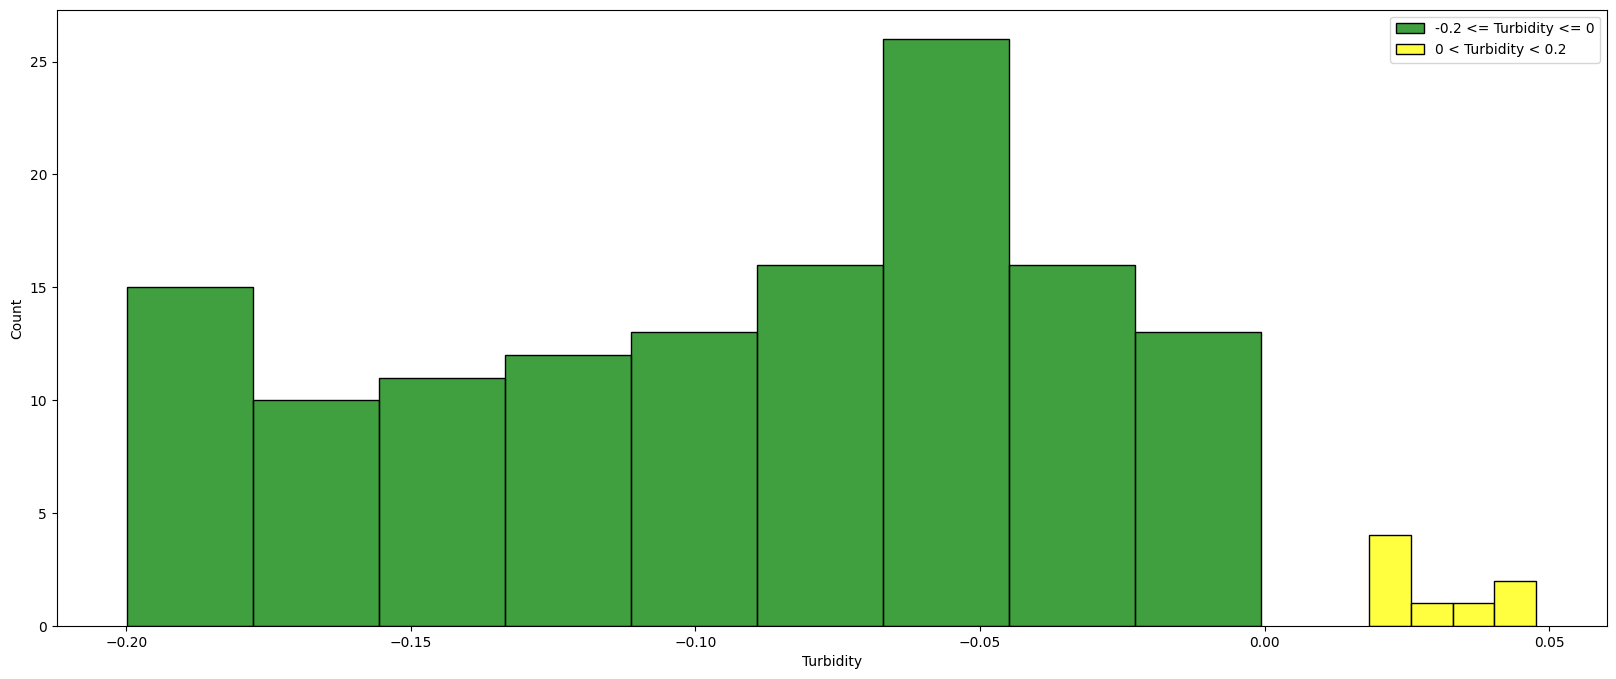

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] <= 0) & (df['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0')
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] > 0) & (df['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2')
ax.set_xlabel('Turbidity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Most of the Turbidity lies in ok zones

But still needs treatment

### *Before and After Monsoon* 

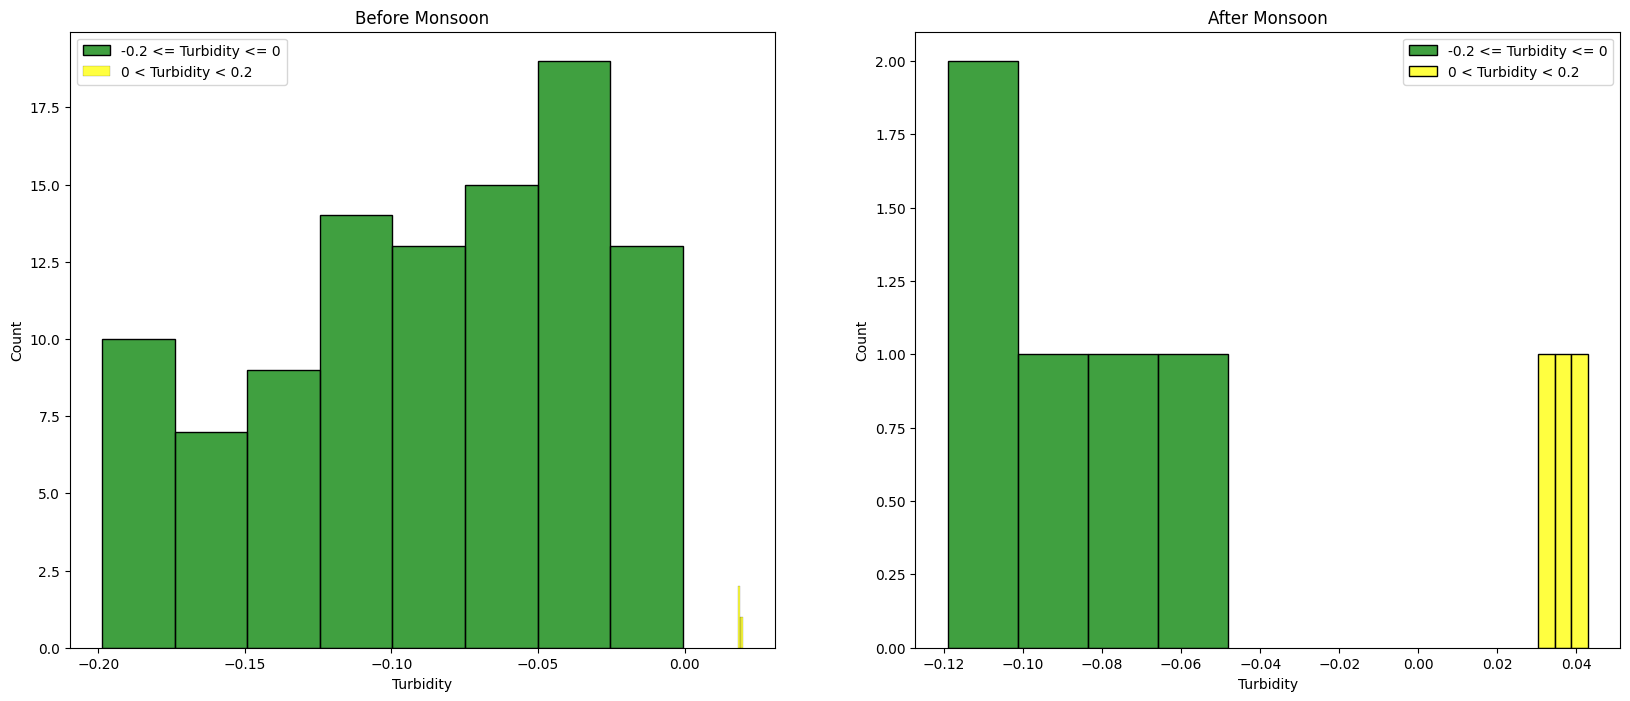

In [17]:
# Create dataframes for before and after monsoon
df_before_monsoon = df[(df.index.month < 6) | (df.index.month == 12)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]

# Create subplots for before and after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for turbidity in each dataframe
sns.histplot(x='Turbidity', data=df_before_monsoon[(df_before_monsoon['Turbidity'] <= 0) & (df_before_monsoon['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0', ax=ax1)
sns.histplot(x='Turbidity', data=df_before_monsoon[(df_before_monsoon['Turbidity'] > 0) & (df_before_monsoon['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2', ax=ax1)
ax1.set_xlabel('Turbidity')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='Turbidity', data=df_after_monsoon[(df_after_monsoon['Turbidity'] <= 0) & (df_after_monsoon['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0', ax=ax2)
sns.histplot(x='Turbidity', data=df_after_monsoon[(df_after_monsoon['Turbidity'] > 0) & (df_after_monsoon['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2', ax=ax2)
ax2.set_xlabel('Turbidity')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()

plt.show()

### *Before and After COVID-19*

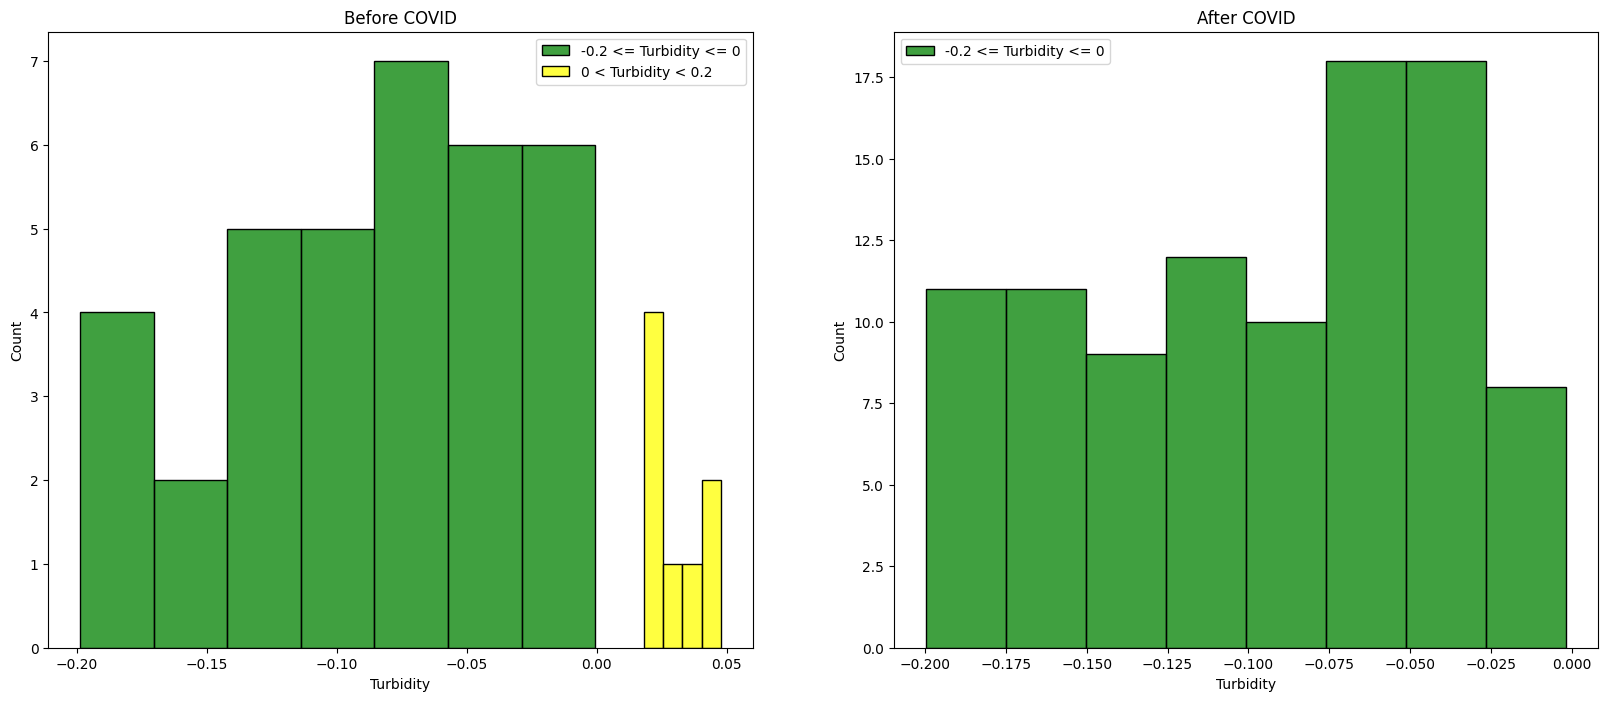

In [25]:
# Create dataframes for before and after COVID
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

# Create subplots for before and after COVID
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for turbidity in each dataframe
sns.histplot(x='Turbidity', data=df_before_covid[(df_before_covid['Turbidity'] <= 0) & (df_before_covid['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0', ax=ax1)
sns.histplot(x='Turbidity', data=df_before_covid[(df_before_covid['Turbidity'] > 0) & (df_before_covid['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2', ax=ax1)
ax1.set_xlabel('Turbidity')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID')
ax1.legend()

sns.histplot(x='Turbidity', data=df_after_covid[(df_after_covid['Turbidity'] <= 0) & (df_after_covid['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0', ax=ax2)
sns.histplot(x='Turbidity', data=df_after_covid[(df_after_covid['Turbidity'] > 0) & (df_after_covid['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2', ax=ax2)
ax2.set_xlabel('Turbidity')
ax2.set_ylabel('Count')
ax2.set_title('After COVID')
ax2.legend()
plt.show()

# Salinity

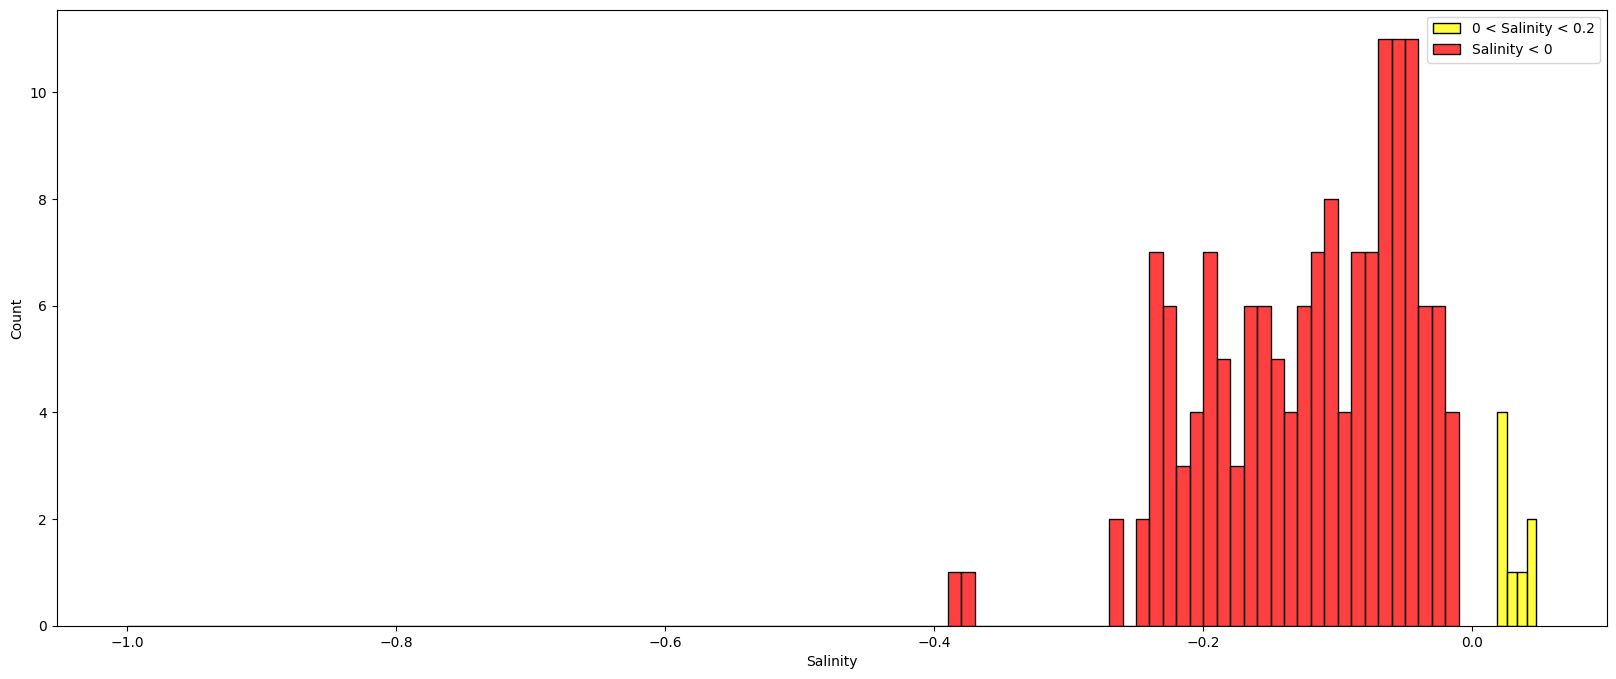

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Salinity', data=df[(df['Salinity'] >= 0) & (df['Salinity'] <=1)], color='yellow', label='0 < Salinity < 0.2')
sns.histplot(x='Salinity', data=df[(df['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01))
ax.set_xlabel('Salinity')
ax.set_ylabel('Count')
ax.legend()
plt.show()


Almost all of the values of Salinity lie in need treatment zone.




### *Before and After Monsoon*

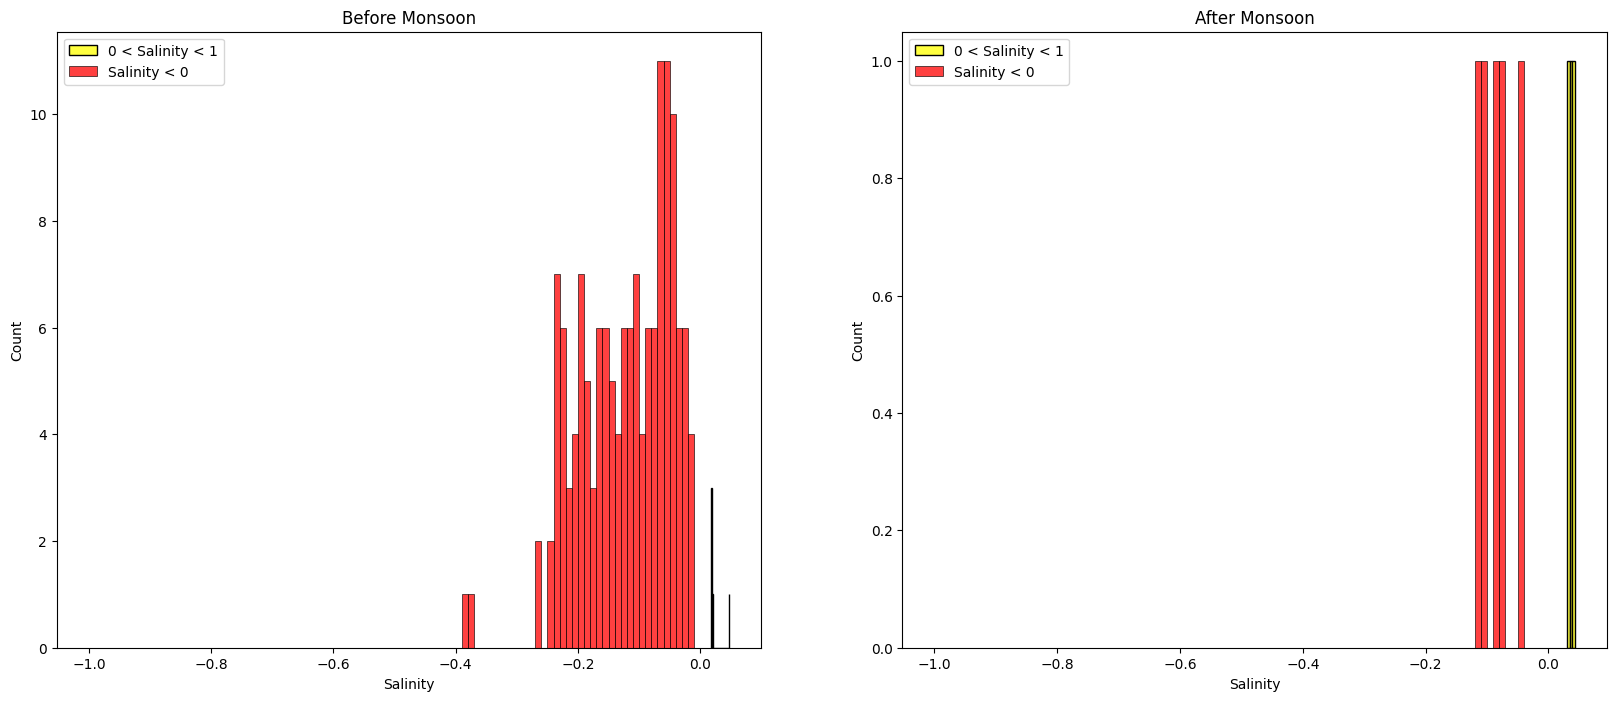

In [28]:
# Before and after monsoon
df_before_monsoon = df[(df.index.month < 6) | (df.index.month > 9)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]

# Plot before and after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.histplot(x='Salinity', data=df_before_monsoon[(df_before_monsoon['Salinity'] >= 0) & (df_before_monsoon['Salinity'] <=1)], color='yellow', label='0 < Salinity < 1', ax=ax1)
sns.histplot(x='Salinity', data=df_before_monsoon[(df_before_monsoon['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01), ax=ax1)
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='Salinity', data=df_after_monsoon[(df_after_monsoon['Salinity'] >= 0) & (df_after_monsoon['Salinity'] <=1)], color='yellow', label='0 < Salinity < 1', ax=ax2)
sns.histplot(x='Salinity', data=df_after_monsoon[(df_after_monsoon['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01), ax=ax2)
ax2.set_xlabel('Salinity')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()

plt.show()

### *Before and After COVID-19*

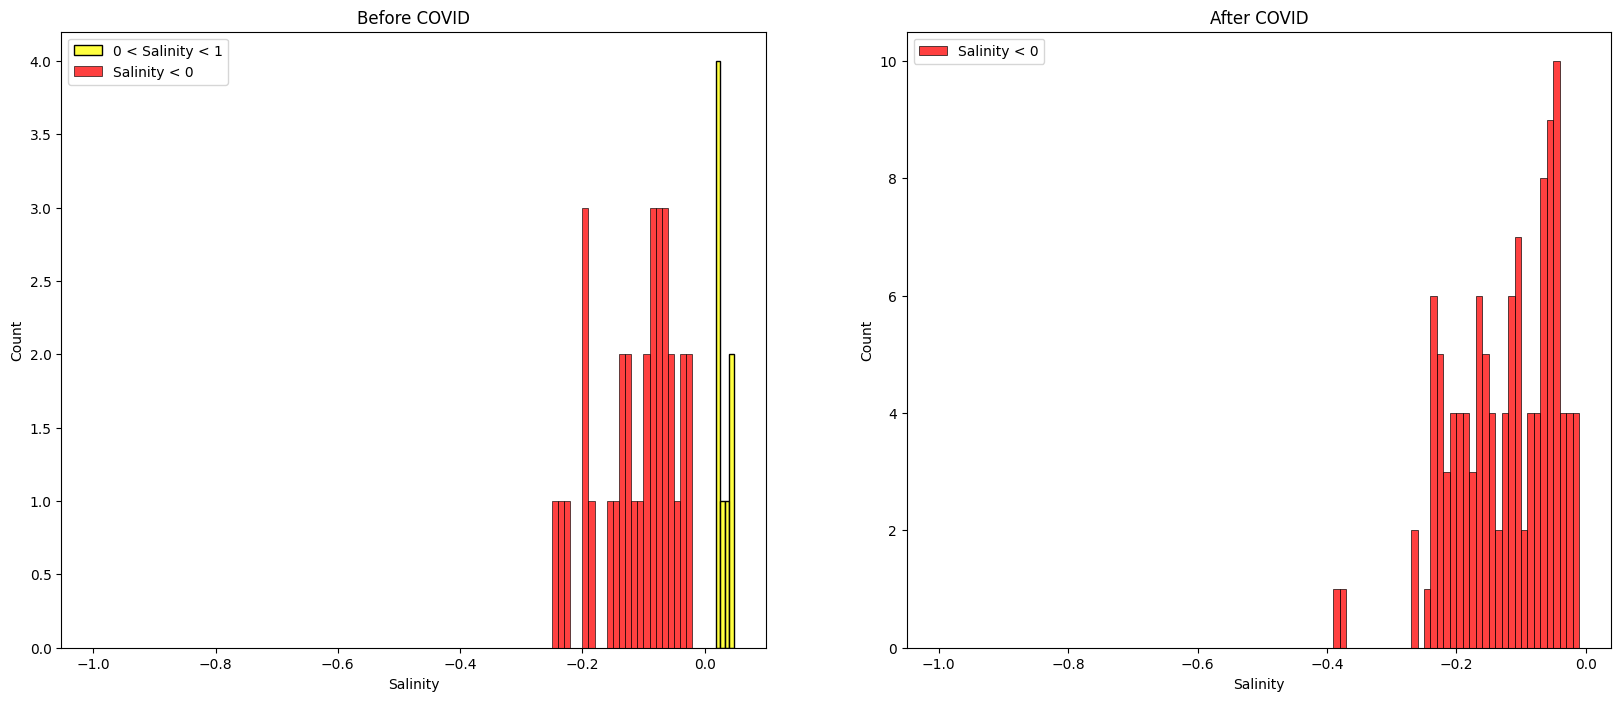

In [29]:
# Before and after COVID
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

# Plot before and after COVID
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.histplot(x='Salinity', data=df_before_covid[(df_before_covid['Salinity'] >= 0) & (df_before_covid['Salinity'] <=1)], color='yellow', label='0 < Salinity < 1', ax=ax1)
sns.histplot(x='Salinity', data=df_before_covid[(df_before_covid['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01), ax=ax1)
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID')
ax1.legend()

sns.histplot(x='Salinity', data=df_after_covid[(df_after_covid['Salinity'] >= 0) & (df_after_covid['Salinity'] <=1)], color='yellow', label='0 < Salinity < 1', ax=ax2)
sns.histplot(x='Salinity', data=df_after_covid[(df_after_covid['Salinity'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01), ax=ax2)
ax2.set_xlabel('Salinity')
ax2.set_ylabel('Count')
ax2.set_title('After COVID')
ax2.legend()

plt.show()

# Dissolved Oxygen

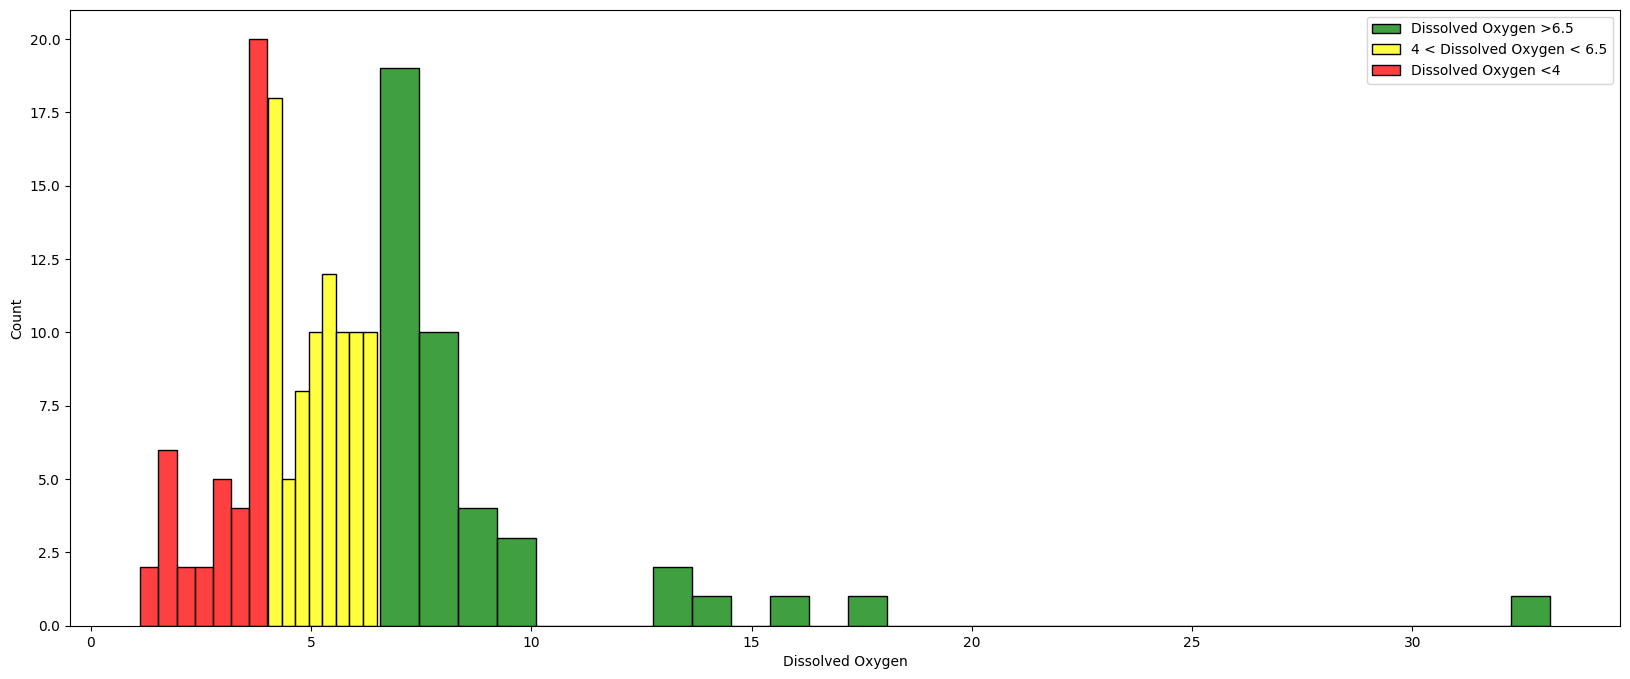

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >= 4) & (df['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4')
ax.set_xlabel('Dissolved Oxygen')
ax.set_ylabel('Count')
ax.legend()
plt.show()

The zones of Dissolved Oxygen are in almost equal ratio.


### *Before and After Monsoon*

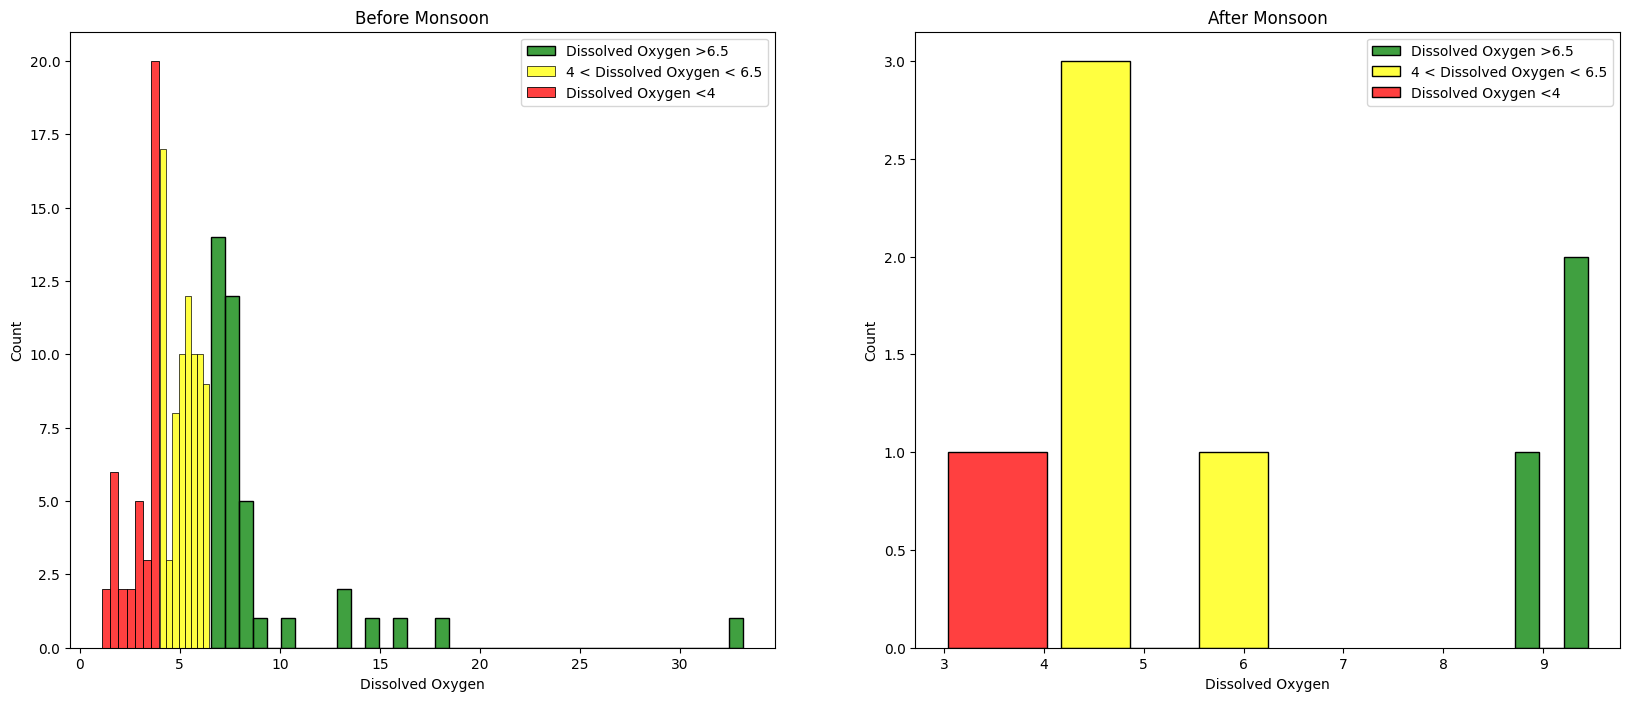

In [30]:
# Filter data for before and after monsoon periods
df_before_monsoon = df[(df.index.month < 6) | (df.index.month > 9)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]

# Create subplots for before and after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for dissolved oxygen in each dataframe
sns.histplot(x='Dissolved Oxygen', data=df_before_monsoon[(df_before_monsoon['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5', ax=ax1)
sns.histplot(x='Dissolved Oxygen', data=df_before_monsoon[(df_before_monsoon['Dissolved Oxygen'] >= 4) & (df_before_monsoon['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5', ax=ax1)
sns.histplot(x='Dissolved Oxygen', data=df_before_monsoon[(df_before_monsoon['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4', ax=ax1)
ax1.set_xlabel('Dissolved Oxygen')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='Dissolved Oxygen', data=df_after_monsoon[(df_after_monsoon['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5', ax=ax2)
sns.histplot(x='Dissolved Oxygen', data=df_after_monsoon[(df_after_monsoon['Dissolved Oxygen'] >= 4) & (df_after_monsoon['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5', ax=ax2)
sns.histplot(x='Dissolved Oxygen', data=df_after_monsoon[(df_after_monsoon['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4', ax=ax2)
ax2.set_xlabel('Dissolved Oxygen')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()
plt.show()


### *Before and After COVID-19*

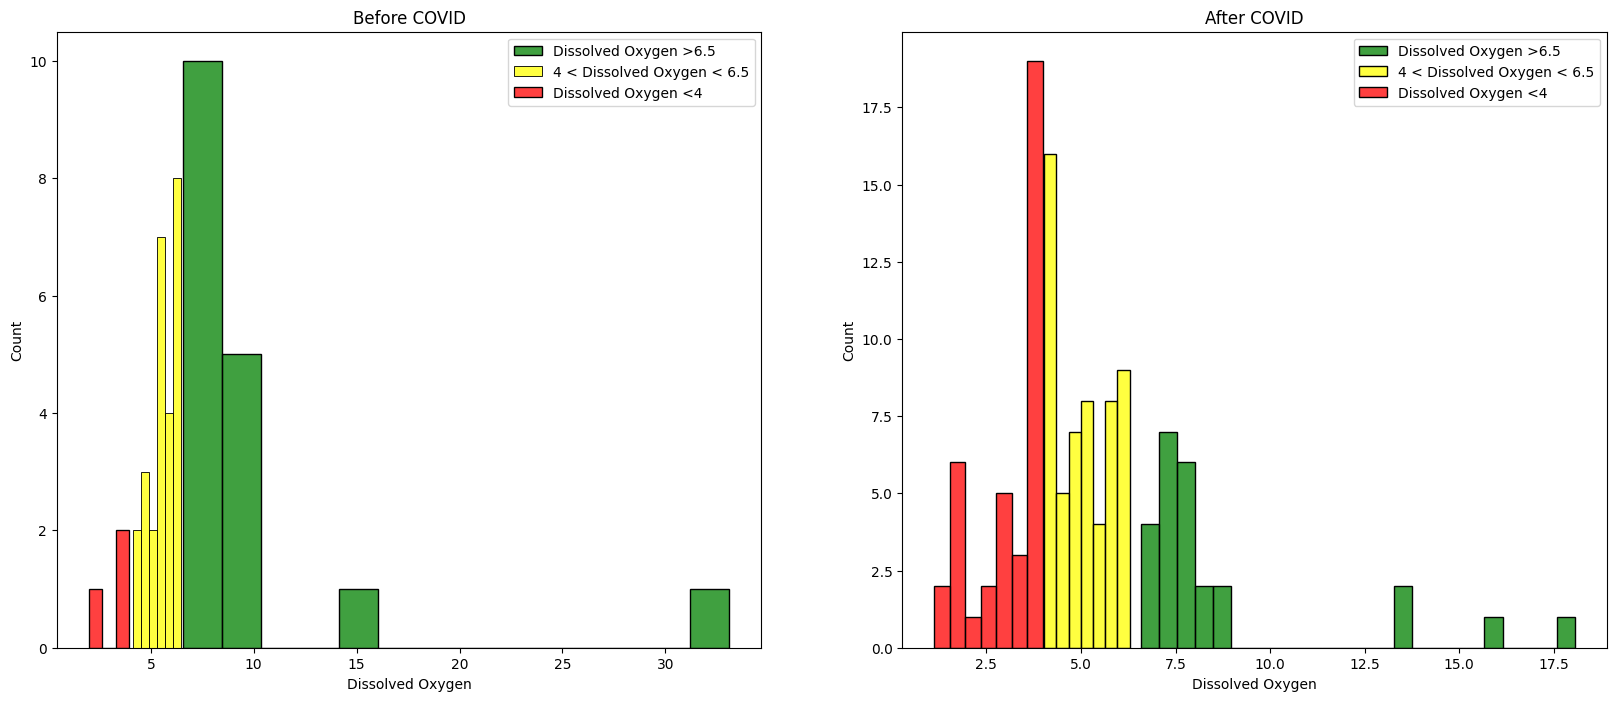

In [31]:
# Filter data for before and after COVID periods
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

# Create subplots for before and after COVID
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for dissolved oxygen in each dataframe
sns.histplot(x='Dissolved Oxygen', data=df_before_covid[(df_before_covid['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5', ax=ax1)
sns.histplot(x='Dissolved Oxygen', data=df_before_covid[(df_before_covid['Dissolved Oxygen'] >= 4) & (df_before_covid['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5', ax=ax1)
sns.histplot(x='Dissolved Oxygen', data=df_before_covid[(df_before_covid['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4', ax=ax1)
ax1.set_xlabel('Dissolved Oxygen')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID')
ax1.legend()

sns.histplot(x='Dissolved Oxygen', data=df_after_covid[(df_after_covid['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5', ax=ax2)
sns.histplot(x='Dissolved Oxygen', data=df_after_covid[(df_after_covid['Dissolved Oxygen'] >= 4) & (df_after_covid['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5', ax=ax2)
sns.histplot(x='Dissolved Oxygen', data=df_after_covid[(df_after_covid['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4', ax=ax2)
ax2.set_xlabel('Dissolved Oxygen')
ax2.set_ylabel('Count')
ax2.set_title('After COVID')
ax2.legend()
plt.show()

# pH

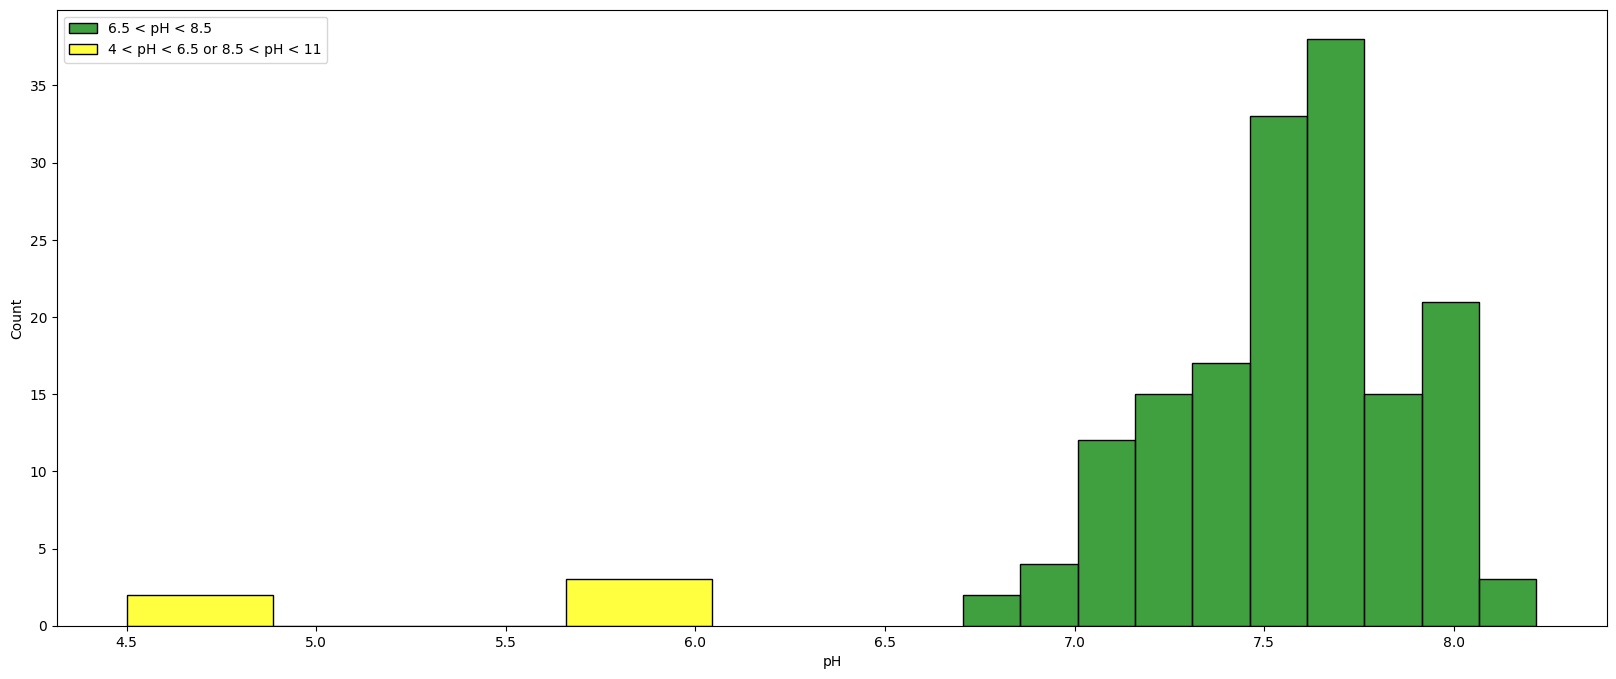

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='pH', data=df[(df['pH'] >= 6.5) & (df['pH'] <=8.5)], color='green', label='6.5 < pH < 8.5')
sns.histplot(x='pH', data=df[((df['pH'] > 4) & (df['pH'] < 6.5)) | ((df['pH'] < 11)&(df['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11')
sns.histplot(x='pH', data=df[((df['pH'] > 11) & (df['pH'] < 14)) | ((df['pH'] < 4)&(df['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4')
ax.set_xlabel('pH')
ax.set_ylabel('Count')
ax.legend()
plt.show()

pH levels are most of the times stable

Points below six are outliers

### *Before and after Monsoon*

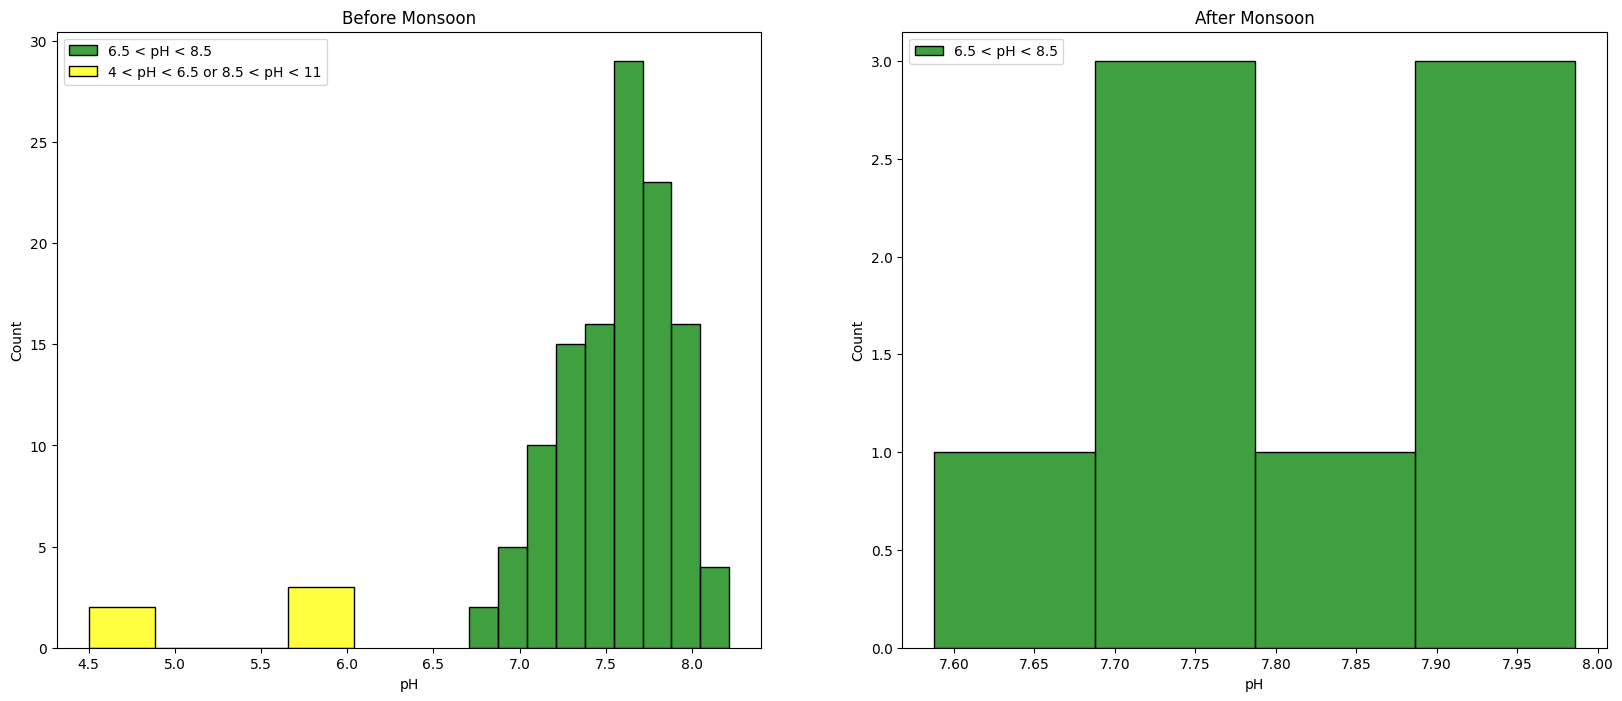

In [19]:
# Create dataframes for before and after monsoon
df_before_monsoon = df[(df.index.month < 6) | (df.index.month == 12)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]

# Create subplots for before and after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for pH in each dataframe
sns.histplot(x='pH', data=df_before_monsoon[(df_before_monsoon['pH'] >= 6.5) & (df_before_monsoon['pH'] <= 8.5)], color='green', label='6.5 < pH < 8.5', ax=ax1)
sns.histplot(x='pH', data=df_before_monsoon[((df_before_monsoon['pH'] > 4) & (df_before_monsoon['pH'] < 6.5)) | ((df_before_monsoon['pH'] < 11)&(df_before_monsoon['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11', ax=ax1)
sns.histplot(x='pH', data=df_before_monsoon[((df_before_monsoon['pH'] > 11) & (df_before_monsoon['pH'] < 14)) | ((df_before_monsoon['pH'] < 4)&(df_before_monsoon['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4', ax=ax1)
ax1.set_xlabel('pH')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='pH', data=df_after_monsoon[(df_after_monsoon['pH'] >= 6.5) & (df_after_monsoon['pH'] <= 8.5)], color='green', label='6.5 < pH < 8.5', ax=ax2)
sns.histplot(x='pH', data=df_after_monsoon[((df_after_monsoon['pH'] > 4) & (df_after_monsoon['pH'] < 6.5)) | ((df_after_monsoon['pH'] < 11)&(df_after_monsoon['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11', ax=ax2)
sns.histplot(x='pH', data=df_after_monsoon[((df_after_monsoon['pH'] > 11) & (df_after_monsoon['pH'] < 14)) | ((df_after_monsoon['pH'] < 4)&(df_after_monsoon['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4', ax=ax2)
ax2.set_xlabel('pH')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()

plt.show()


### *Before and after COVID-19*

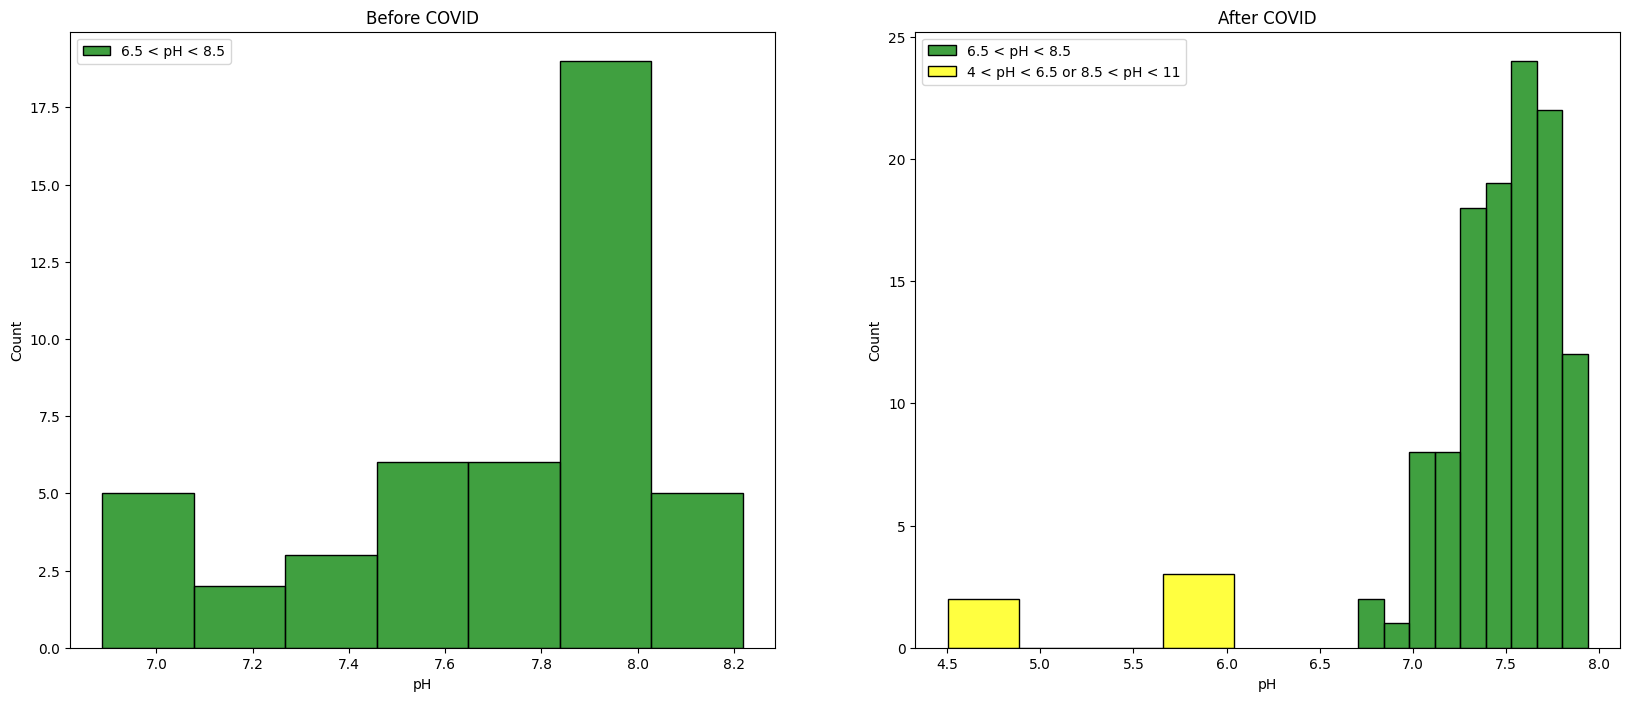

In [27]:
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

# Create subplots for before and after COVID
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for pH in each dataframe
sns.histplot(x='pH', data=df_before_covid[(df_before_covid['pH'] >= 6.5) & (df_before_covid['pH'] <= 8.5)], color='green', label='6.5 < pH < 8.5', ax=ax1)
sns.histplot(x='pH', data=df_before_covid[((df_before_covid['pH'] > 4) & (df_before_covid['pH'] < 6.5)) | ((df_before_covid['pH'] < 11) & (df_before_covid['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11', ax=ax1)
sns.histplot(x='pH', data=df_before_covid[((df_before_covid['pH'] > 11) & (df_before_covid['pH'] < 14)) | ((df_before_covid['pH'] < 4) & (df_before_covid['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4', ax=ax1)
ax1.set_xlabel('pH')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID')
ax1.legend()

sns.histplot(x='pH', data=df_after_covid[(df_after_covid['pH'] >= 6.5) & (df_after_covid['pH'] <= 8.5)], color='green', label='6.5 < pH < 8.5', ax=ax2)
sns.histplot(x='pH', data=df_after_covid[((df_after_covid['pH'] > 4) & (df_after_covid['pH'] < 6.5)) | ((df_after_covid['pH'] < 11) & (df_after_covid['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11', ax=ax2)
sns.histplot(x='pH', data=df_after_covid[((df_after_covid['pH'] > 11) & (df_after_covid['pH'] < 14)) | ((df_after_covid['pH'] < 4) & (df_after_covid['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4', ax=ax2)
ax2.set_xlabel('pH')
ax2.set_ylabel('Count')
ax2.set_title('After COVID')
ax2.legend()
plt.show()


# Temperature

In [3]:
df = pd.read_csv("Temperature_Upper Lake_LW.csv",parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df=df.set_index("date")
df

,Temperature,Year,Month,Day
date,,,,
2015-01-04,21.589863,2015,01,04
2015-01-11,19.941905,2015,01,11
2015-01-20,12.130249,2015,01,20
2015-01-27,19.471058,2015,01,27
2015-02-05,17.831090,2015,02,05
...,...,...,...,...
2022-11-23,28.061445,2022,11,23
2022-11-30,24.317507,2022,11,30
2022-12-09,22.736492,2022,12,09


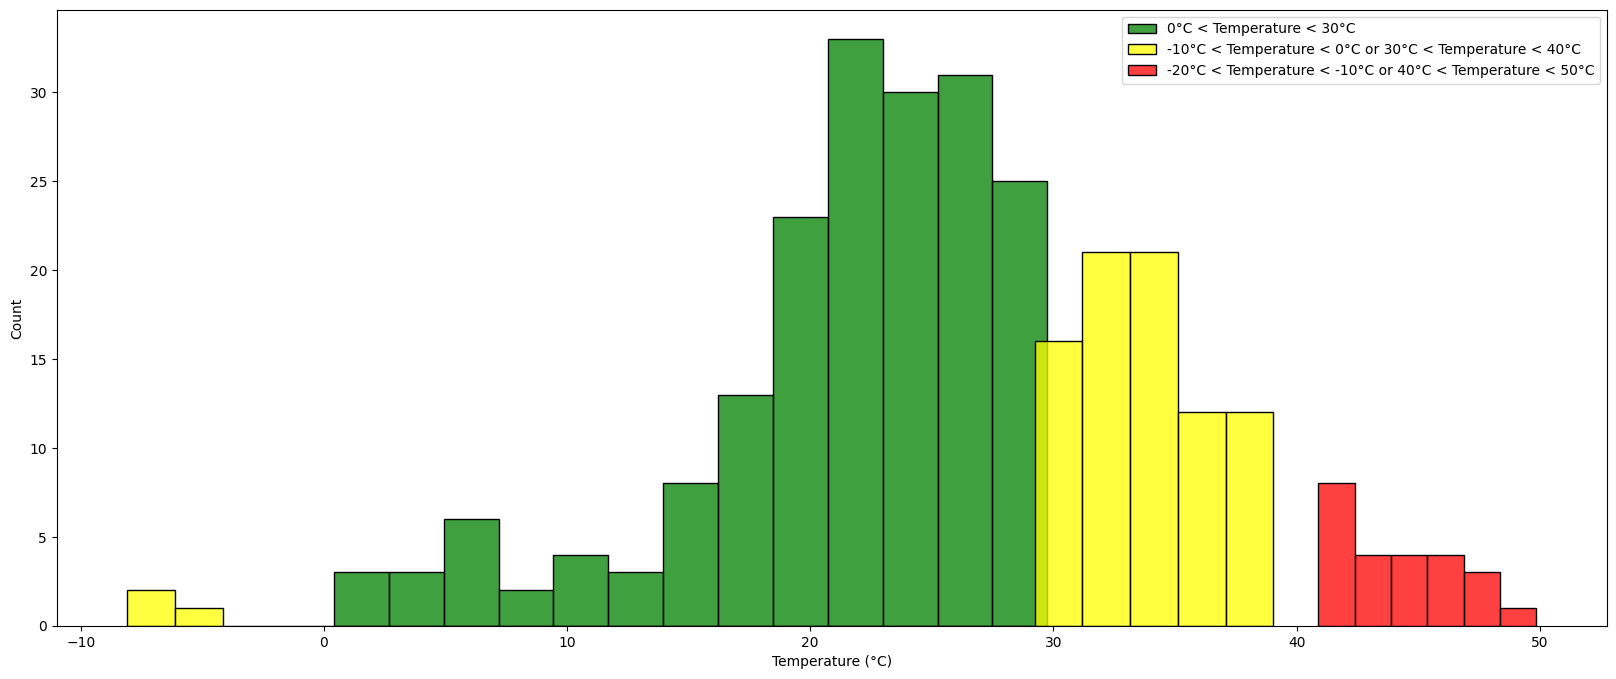

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Temperature', data=df[(df['Temperature'] >= 0) & (df['Temperature'] <= 30)], color='green', label='0°C < Temperature < 30°C')
sns.histplot(x='Temperature', data=df[((df['Temperature'] > 30) & (df['Temperature'] < 40)) | ((df['Temperature'] < 0) & (df['Temperature'] > -10))], color='yellow', label='-10°C < Temperature < 0°C or 30°C < Temperature < 40°C')
sns.histplot(x='Temperature', data=df[((df['Temperature'] > 40) & (df['Temperature'] < 50)) | ((df['Temperature'] < -10) & (df['Temperature'] > -20))], color='red', label='-20°C < Temperature < -10°C or 40°C < Temperature < 50°C')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Count')
ax.legend()
plt.show()

### *Before and after monsoon*

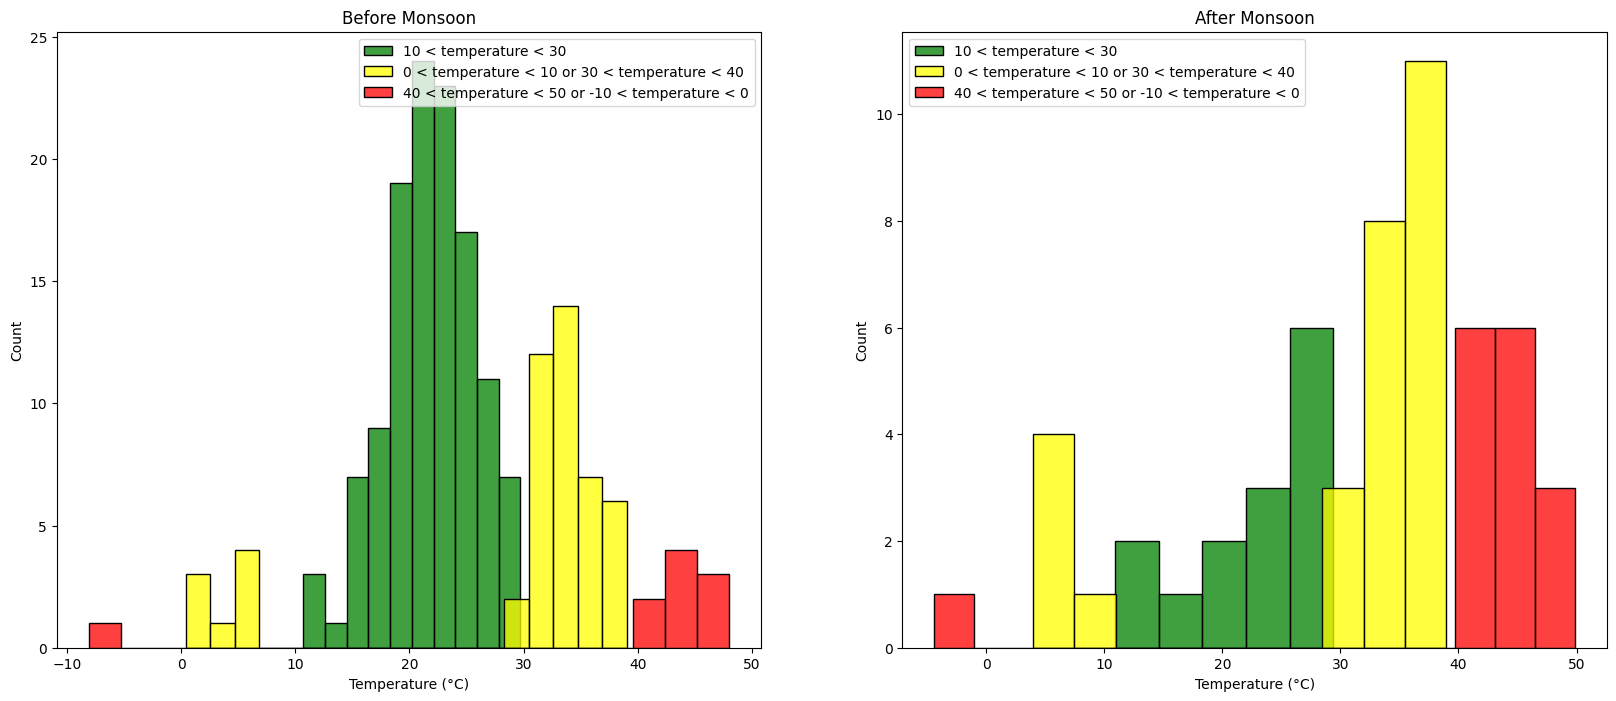

In [6]:
# Create dataframes for before and after monsoon
df_before_monsoon = df[(df.index.month < 6) | (df.index.month == 12)]
df_after_monsoon = df[(df.index.month >= 6) & (df.index.month <= 9)]

# Create subplots for before and after monsoon
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for temperature in each dataframe
sns.histplot(x='Temperature', data=df_before_monsoon[(df_before_monsoon['Temperature'] >= 10) & (df_before_monsoon['Temperature'] <= 30)], color='green', label='10 < temperature < 30', ax=ax1)
sns.histplot(x='Temperature', data=df_before_monsoon[((df_before_monsoon['Temperature'] > 0) & (df_before_monsoon['Temperature'] < 10)) | ((df_before_monsoon['Temperature'] < 40)&(df_before_monsoon['Temperature'] > 30))], color='yellow', label='0 < temperature < 10 or 30 < temperature < 40', ax=ax1)
sns.histplot(x='Temperature', data=df_before_monsoon[((df_before_monsoon['Temperature'] > 40) & (df_before_monsoon['Temperature'] < 50)) | ((df_before_monsoon['Temperature'] < 0)&(df_before_monsoon['Temperature'] > -10))], color='red', label='40 < temperature < 50 or -10 < temperature < 0', ax=ax1)
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Count')
ax1.set_title('Before Monsoon')
ax1.legend()

sns.histplot(x='Temperature', data=df_after_monsoon[(df_after_monsoon['Temperature'] >= 10) & (df_after_monsoon['Temperature'] <= 30)], color='green', label='10 < temperature < 30', ax=ax2)
sns.histplot(x='Temperature', data=df_after_monsoon[((df_after_monsoon['Temperature'] > 0) & (df_after_monsoon['Temperature'] < 10)) | ((df_after_monsoon['Temperature'] < 40)&(df_after_monsoon['Temperature'] > 30))], color='yellow', label='0 < temperature < 10 or 30 < temperature < 40', ax=ax2)
sns.histplot(x='Temperature', data=df_after_monsoon[((df_after_monsoon['Temperature'] > 40) & (df_after_monsoon['Temperature'] < 50)) | ((df_after_monsoon['Temperature'] < 0)&(df_after_monsoon['Temperature'] > -10))], color='red', label='40 < temperature < 50 or -10 < temperature < 0', ax=ax2)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Count')
ax2.set_title('After Monsoon')
ax2.legend()

plt.show()


### *Before and after COVID-19*

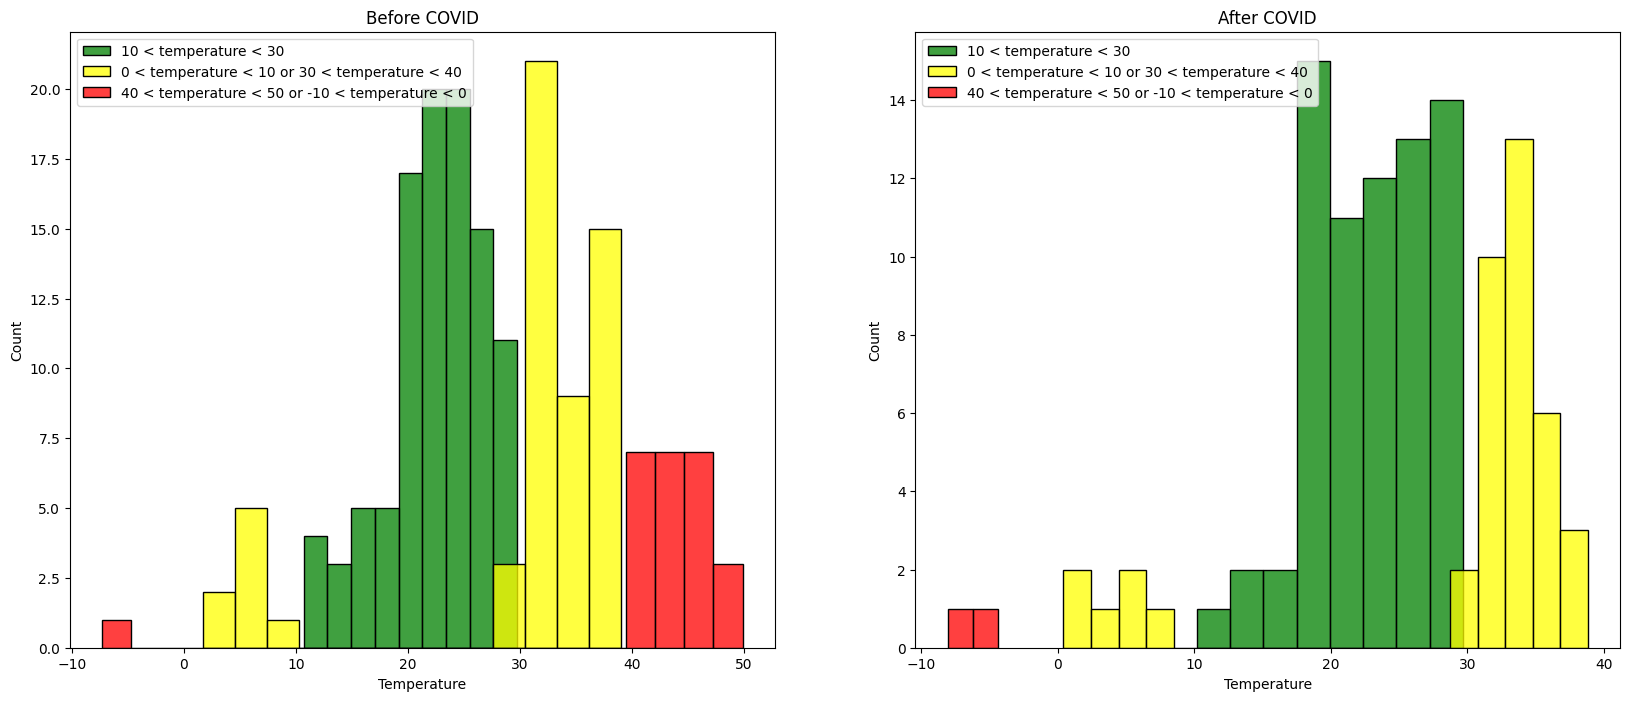

In [9]:
df_before_covid = df[df.index.year < 2020]
df_after_covid = df[df.index.year >= 2020]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot histograms for temperature in each dataframe
sns.histplot(x='Temperature', data=df_before_covid[(df_before_covid['Temperature'] >= 10) & (df_before_covid['Temperature'] <= 30)], color='green', label='10 < temperature < 30', ax=ax1)
sns.histplot(x='Temperature', data=df_before_covid[((df_before_covid['Temperature'] > 0) & (df_before_covid['Temperature'] < 10)) | ((df_before_covid['Temperature'] < 40)&(df_before_covid['Temperature'] > 30))], color='yellow', label='0 < temperature < 10 or 30 < temperature < 40', ax=ax1)
sns.histplot(x='Temperature', data=df_before_covid[((df_before_covid['Temperature'] > 40) & (df_before_covid['Temperature'] < 50)) | ((df_before_covid['Temperature'] < 0)&(df_before_covid['Temperature'] > -10))], color='red', label='40 < temperature < 50 or -10 < temperature < 0', ax=ax1)

sns.histplot(x='Temperature', data=df_after_covid[(df_after_covid['Temperature'] >= 10) & (df_after_covid['Temperature'] <= 30)], color='green', label='10 < temperature < 30', ax=ax2)
sns.histplot(x='Temperature', data=df_after_covid[((df_after_covid['Temperature'] > 0) & (df_after_covid['Temperature'] < 10)) | ((df_after_covid['Temperature'] < 40)&(df_after_covid['Temperature'] > 30))], color='yellow', label='0 < temperature < 10 or 30 < temperature < 40', ax=ax2)
sns.histplot(x='Temperature', data=df_after_covid[((df_after_covid['Temperature'] > 40) & (df_after_covid['Temperature'] < 50)) | ((df_after_covid['Temperature'] < 0)&(df_after_covid['Temperature'] > -10))], color='red', label='40 < temperature < 50 or -10 < temperature < 0', ax=ax2)

ax1.set_xlabel('Temperature')
ax1.set_ylabel('Count')
ax1.set_title('Before COVID')
ax1.legend()

ax2.set_xlabel('Temperature')
ax2.set_ylabel('Count')
ax2.set_title('After COVID')
ax2.legend()

plt.show()

# Suspended Matter

In [ ]:
df = pd.read_csv("Suspended Matter_LW",parse_dates=True)

df.head()

### *Before and After Monsoon*

### *Before and After COVID-19*

# Organic Matter

In [10]:
df = pd.read_csv("Organic Matter_Upper Lake_LW.csv",parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df=df.set_index("date")
df

,Organic Matter,Year,Month,Day
date,,,,
2016-04-29,0.519313,2016,04,29
2016-04-30,0.509203,2016,04,30
2016-05-03,0.474951,2016,05,03
2016-05-04,0.555740,2016,05,04
2016-05-07,0.490789,2016,05,07
...,...,...,...,...
2023-02-24,0.282206,2023,02,24
2023-02-25,0.336515,2023,02,25
2023-02-26,0.398371,2023,02,26


KeyError: 'Dissolved Organic Matter'

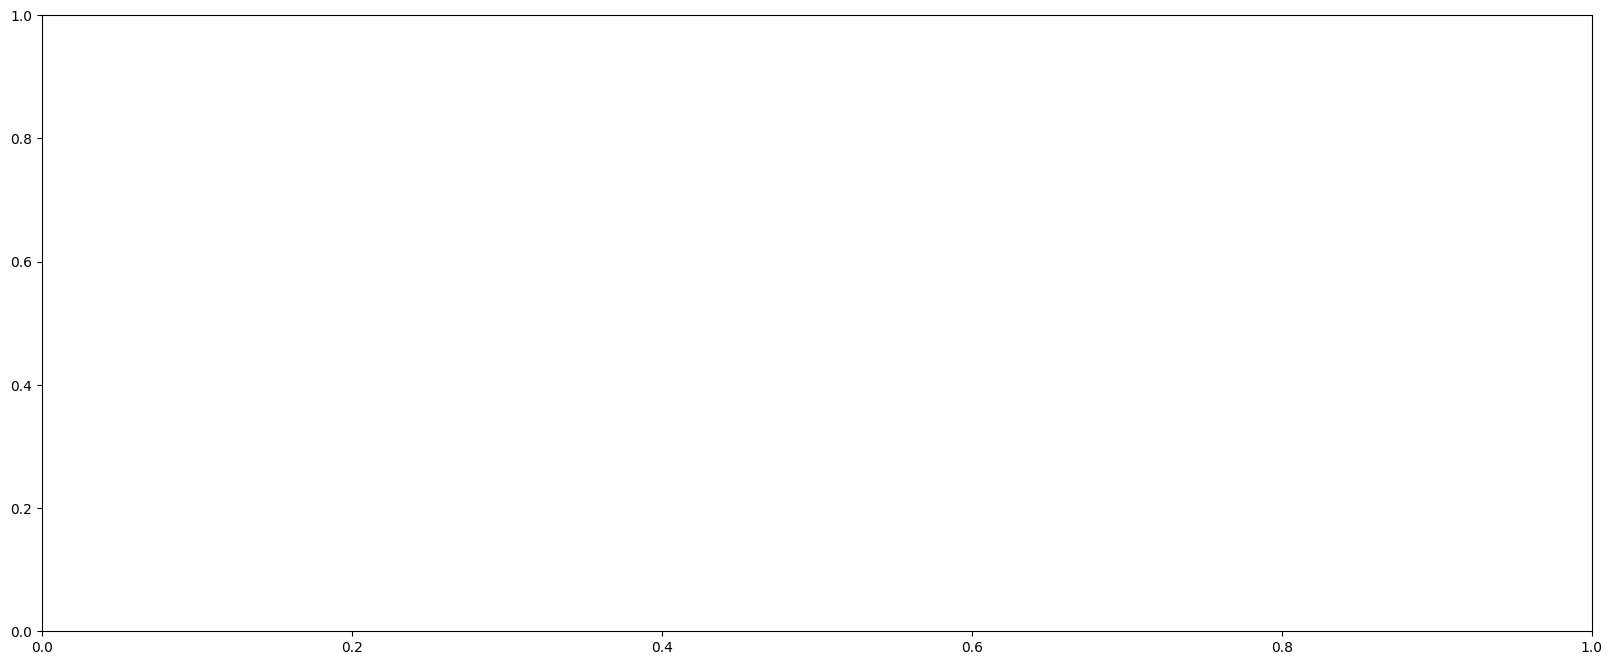

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] <0.5 )], color='green', label='Dissolved Organic Matter < 0.5')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] >= 0.5) & (df['Dissolved Organic Matter'] <=2)], color='yellow', label='0.5 < Dissolved Organic Matter < 2')
sns.histplot(x='Dissolved Organic Matter', data=df[(df['Dissolved Organic Matter'] > 2 )], color='red', label='Dissolved Organic Matter >= 2')
ax.set_xlabel('Dissolved Organic Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

### *Before and After Monsoon*

### *Before and After COVID-19*